In [1]:
import pixeltable as pxt
import pathlib
from pixeltable.iterators.document import DocumentSplitter

Connected to Pixeltable database at: postgresql://postgres:@/pixeltable?host=/Users/orm/.pixeltable/pgdata


In [2]:
doc_paths = [
    pathlib.Path(pxt.__path__[0]) / 'tests/data/documents/layout-parser-paper.pdf',
    pathlib.Path(pxt.__path__[0]) / 'tests/data/documents/1706.03762.pdf',
    pathlib.Path(pxt.__path__[0]) / 'tests/data/documents/Michael Stonebraker - Wikipedia.html',
]

In [5]:
pxt.drop_table('doc_paragraphs', ignore_errors=True)
pxt.drop_table('doc_table', ignore_errors=True)

doc_table = pxt.create_table('doc_table', {'document' : pxt.DocumentType()})
doc_table.insert({'document': str(doc_path)} for doc_path in doc_paths)

Created table `doc_table`.
Inserting rows into `doc_table`: 3 rows [00:00, 1796.28 rows/s]
Inserted 3 rows with 0 errors.


UpdateStatus(num_rows=3, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

document
""
""
/Users/orm/repos/pixeltable/pixeltable/tests/data/documents/Michael Stonebraker - Wikipedia.html

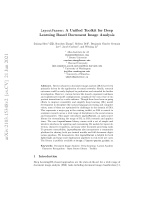
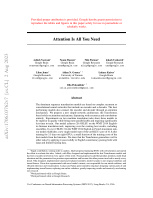

In [6]:
doc_table.show()

In [7]:
iterator_args = {
    'document': doc_table.document,
    'separators': 'paragraph',
    'metadata': 'page, bounding_box, heading'
}
paragraph_table = pxt.create_view(f'doc_paragraphs', doc_table, iterator_class=DocumentSplitter, iterator_args=iterator_args)

Inserting rows into `doc_paragraphs`: 671 rows [00:00, 11316.63 rows/s]
Created view `doc_paragraphs` with 671 rows, 0 exceptions.


pos,text,page,bounding_box,heading,document
0,LayoutParser: A Unified Toolkit for Deep\nLearning Based Document Image Analysis\n,0,"{'x1': 157.6219940185547, 'x2': 457.8017883300781, 'y1': 115.03832244873047, 'y2': 147.33184814453125}",None,
1,"Zejiang Shen1 (), Ruochen Zhang2, Melissa Dell3, Benjamin Charles Germain\nLee4, Jacob Carlson3, and Weining Li5\n",0,"{'x1': 134.8090057373047, 'x2': 480.54638671875, 'y1': 167.27603149414062, 'y2': 192.8096160888672}",None,
2,"1 Allen Institute for AI\nshannons@allenai.org\n2 Brown University\nruochen zhang@brown.edu\n3 Harvard University\n{melissadell,jacob carlson}@fas.harvard.edu\n4 University of Washington\nbcgl@cs.washington.edu\n5 University of Waterloo\nw422li@uwaterloo.ca\n",0,"{'x1': 207.23001098632812, 'x2': 408.1268615722656, 'y1': 200.6651611328125, 'y2': 312.072998046875}",None,
3,"Abstract. Recent advances in document image analysis (DIA) have been\nprimarily driven by the application of neural networks. Ideally, research\noutcomes could be easily deployed in production and extended for further\ninvestigation. However, various factors like loosely organized codebases\nand sophisticated model configurations complicate the easy reuse of im-\nportant innovations by a wide audience. Though there have been on-going\nefforts to improve reusability and simplify deep learning (DL) model\ndevelopment in disciplines like natural language processing and computer\nvision, none of them are optimized for challenges in the domain of DIA.\nThis represents a major gap in the existing toolkit, as DIA is central to\nacademic research across a wide range of disciplines in the social sciences\nand humanities. This paper introduces LayoutParser, an open-source\nlibrary for streamlining the usage of DL in DIA research and applica-\ntions. The core LayoutParser library comes with a set of simple and\nintuitive interfaces for applying and customizing DL models for layout de-\ntection, character recognition, and many other document processing tasks.\nTo promote extensibility, LayoutParser also incorporates a community\nplatform for sharing both pre-trained models and full document digiti-\nzation pipelines. We demonstrate that LayoutParser is helpful for both\nlightweight and large-scale digitization pipelines in real-word use cases.\nThe library is publicly available at https://layout-parser.github.io.\n",0,"{'x1': 162.7790069580078, 'x2': 454.092529296875, 'y1': 338.9521789550781, 'y2': 567.0989990234375}",None,
4,Keywords: Document Image Analysis · Deep Learning · Layout Analysis\n· Character Recognition · Open Source library · Toolkit.\n,0,"{'x1': 162.3459930419922, 'x2': 452.2435302734375, 'y1': 577.9205322265625, 'y2': 600.168212890625}",None,
5,1\nIntroduction\n,0,"{'x1': 134.7650146484375, 'x2': 228.99588012695312, 'y1': 619.8935546875, 'y2': 631.8607177734375}",None,
6,"Deep Learning(DL)-based approaches are the state-of-the-art for a wide range of\ndocument image analysis (DIA) tasks including document image classification [11,\n",0,"{'x1': 134.76499938964844, 'x2': 481.96844482421875, 'y1': 643.4950561523438, 'y2': 665.4126586914062}",None,
7,arXiv:2103.15348v2 [cs.CV] 21 Jun 2021\n,0,"{'x1': 10.940000534057617, 'x2': 37.619998931884766, 'y1': 213.3599853515625, 'y2': 560.0}",None,
8,2\nZ. Shen et al.\n,1,"{'x1': 134.76499938964844, 'x2': 222.0977325439453, 'y1': 93.17021942138672, 'y2': 102.1366195678711}",None,
9,"37], layout detection [38, 22], table detection [26], and scene text detection [4].\nA generalized learning-based framework dramatically reduces the need for the\nmanual specification of complicated rules, which is the status quo with traditional\nmethods. DL has the potential to transform DIA pipelines and benefit a broad\nspectrum of large-scale document digitization projects.\nHowever, there are several practical difficulties for taking advantages of re-\ncent advances in DL-based methods: 1) DL models are notoriously convoluted\nfor reuse and extension. Existing models 
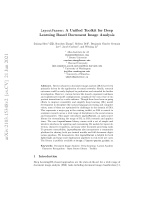
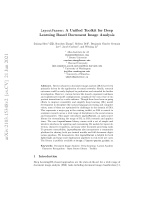
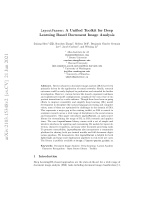
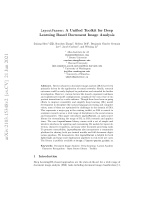
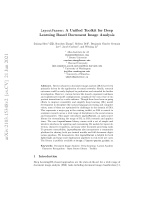
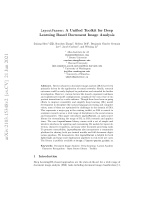
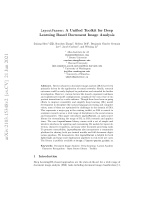
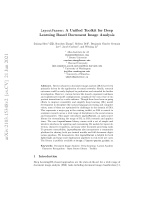
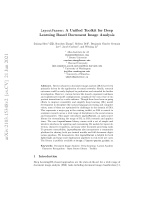
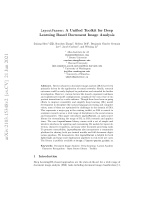
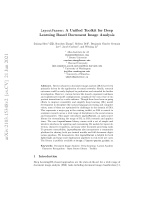
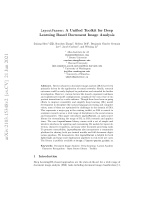
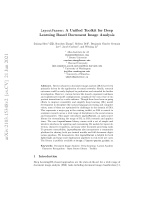
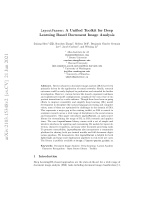
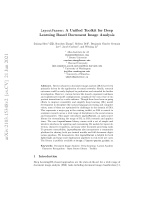
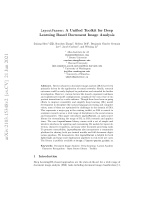
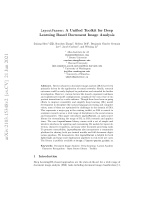
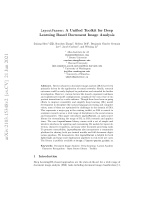
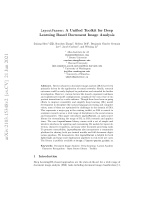
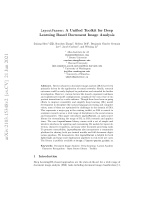

In [9]:
paragraph_table.show()